In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.neighbors import RadiusNeighborsClassifier
#import datetime
from math import sqrt
#import csv
import os
#import time
pd.__version__

'1.5.3'

### Lendo arquivo adult.csv

In [2]:
adult_csv = "adult.csv"

adult = pd.read_csv('./{0}'.format(adult_csv), sep=',')
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Removendo colunas fnlwgt, education, capital-gain, capital-loss e hours-per-week.

In [3]:
adult=adult[['age','workclass','educational-num','marital-status','occupation','relationship','race','gender','native-country','income']]
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,18,?,10,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### Removendo tuplas com valores "?"

In [4]:
#adult.filter(like='?',axis=0)
#adult['elimina']=adult['workclass']=='?'
adult=adult[adult['age']!='?']
adult=adult[adult['workclass']!='?']
adult=adult[adult['educational-num']!='?']
adult=adult[adult['marital-status']!='?']
adult=adult[adult['occupation']!='?']
adult=adult[adult['relationship']!='?']
adult=adult[adult['race']!='?']
adult=adult[adult['gender']!='?']
adult=adult[adult['native-country']!='?']
adult=adult[adult['income']!='?']
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### Codificando as colunas para valores inteiros

In [5]:
adult['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [6]:
def col_workclass(wc):
    if wc == 'Private':
        return 0
    elif wc == 'Local-gov':
        return 1
    elif wc == 'Self-emp-not-inc':
        return 2
    elif wc == 'Federal-gov':
        return 3
    elif wc == 'State-gov':
        return 4
    elif wc == 'Self-emp-inc':
        return 5
    elif wc == 'Without-pay':
        return 6

In [7]:
adult['workclass']= adult['workclass'].apply(col_workclass)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,0,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,1,12,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,0,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,34,0,6,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,0,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,0,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,0,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [8]:
adult['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [9]:
def col_maritial_status(wc):
    if wc == 'Never-married':
        return 0
    elif wc == 'Married-civ-spouse':
        return 1
    elif wc == 'Widowed':
        return 2
    elif wc == 'Separated':
        return 3
    elif wc == 'Divorced':
        return 4
    elif wc == 'Married-spouse-absent':
        return 5
    elif wc == 'Married-AF-spouse':
        return 6

In [10]:
adult['marital-status']= adult['marital-status'].apply(col_maritial_status)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,0,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,0,9,1,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,1,12,1,Protective-serv,Husband,White,Male,United-States,>50K
3,44,0,10,1,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,34,0,6,0,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,0,9,1,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,0,9,2,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,0,9,0,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [11]:
adult['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [12]:
def col_occupation(wc):
    if wc == 'Machine-op-inspct':
        return 0
    elif wc == 'Farming-fishing':
        return 1
    elif wc == 'Protective-serv':
        return 2
    elif wc == 'Other-service':
        return 3
    elif wc == 'Prof-specialty':
        return 4
    elif wc == 'Craft-repair':
        return 5
    elif wc == 'Adm-clerical':
        return 6
    elif wc == 'Exec-managerial':
        return 7
    elif wc == 'Tech-support':
        return 8
    elif wc == 'Sales':
        return 9
    elif wc == 'Priv-house-serv':
        return 10
    elif wc == 'Transport-moving':
        return 11
    elif wc == 'Handlers-cleaners':
        return 12
    elif wc == 'Armed-Forces':
        return 13

In [13]:
adult['occupation']= adult['occupation'].apply(col_occupation)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,0,0,Own-child,Black,Male,United-States,<=50K
1,38,0,9,1,1,Husband,White,Male,United-States,<=50K
2,28,1,12,1,2,Husband,White,Male,United-States,>50K
3,44,0,10,1,0,Husband,Black,Male,United-States,>50K
5,34,0,6,0,3,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,8,Wife,White,Female,United-States,<=50K
48838,40,0,9,1,0,Husband,White,Male,United-States,>50K
48839,58,0,9,2,6,Unmarried,White,Female,United-States,<=50K
48840,22,0,9,0,6,Own-child,White,Male,United-States,<=50K


In [14]:
adult['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [15]:
def col_relationship(wc):
    if wc == 'Own-child':
        return 0
    elif wc == 'Husband':
        return 1
    elif wc == 'Not-in-family':
        return 2
    elif wc == 'Unmarried':
        return 3
    elif wc == 'Wife':
        return 4
    elif wc == 'Other-relative':
        return 5

In [16]:
adult['relationship']= adult['relationship'].apply(col_relationship)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,0,0,0,Black,Male,United-States,<=50K
1,38,0,9,1,1,1,White,Male,United-States,<=50K
2,28,1,12,1,2,1,White,Male,United-States,>50K
3,44,0,10,1,0,1,Black,Male,United-States,>50K
5,34,0,6,0,3,2,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,8,4,White,Female,United-States,<=50K
48838,40,0,9,1,0,1,White,Male,United-States,>50K
48839,58,0,9,2,6,3,White,Female,United-States,<=50K
48840,22,0,9,0,6,0,White,Male,United-States,<=50K


In [17]:
adult['race'].unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

In [18]:
def col_race(wc):
    if wc == 'Black':
        return 0
    elif wc == 'White':
        return 1
    elif wc == 'Other':
        return 2
    elif wc == 'Amer-Indian-Eskimo':
        return 3
    elif wc == 'Asian-Pac-Islander':
        return 4

In [19]:
adult['race']= adult['race'].apply(col_race)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,0,0,0,0,Male,United-States,<=50K
1,38,0,9,1,1,1,1,Male,United-States,<=50K
2,28,1,12,1,2,1,1,Male,United-States,>50K
3,44,0,10,1,0,1,0,Male,United-States,>50K
5,34,0,6,0,3,2,1,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,8,4,1,Female,United-States,<=50K
48838,40,0,9,1,0,1,1,Male,United-States,>50K
48839,58,0,9,2,6,3,1,Female,United-States,<=50K
48840,22,0,9,0,6,0,1,Male,United-States,<=50K


In [20]:
adult['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
def col_gender(wc):
    if wc == 'Male':
        return 0
    elif wc == 'Female':
        return 1

In [22]:
adult['gender']= adult['gender'].apply(col_gender)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,0,0,0,0,0,United-States,<=50K
1,38,0,9,1,1,1,1,0,United-States,<=50K
2,28,1,12,1,2,1,1,0,United-States,>50K
3,44,0,10,1,0,1,0,0,United-States,>50K
5,34,0,6,0,3,2,1,0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,8,4,1,1,United-States,<=50K
48838,40,0,9,1,0,1,1,0,United-States,>50K
48839,58,0,9,2,6,3,1,1,United-States,<=50K
48840,22,0,9,0,6,0,1,0,United-States,<=50K


In [23]:
adult['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [24]:
def col_native_country(wc):
    if wc == 'United-States':
        return 0
    elif wc == 'Peru':
        return 1
    elif wc == 'Guatemala':
        return 2
    elif wc == 'Mexico':
        return 3
    elif wc == 'Dominican-Republic':
        return 4
    elif wc == 'Ireland':
        return 5
    elif wc == 'Germany':
        return 6
    elif wc == 'Philippines':
        return 7
    elif wc == 'Thailand':
        return 8
    elif wc == 'Haiti':
        return 9
    elif wc == 'El-Salvador':
        return 10
    elif wc == 'Puerto-Rico':
        return 11
    elif wc == 'Vietnam':
        return 12
    elif wc == 'South':
        return 13
    elif wc == 'Columbia':
        return 14
    elif wc == 'Japan':
        return 15
    elif wc == 'India':
        return 16
    elif wc == 'Cambodia':
        return 17
    elif wc == 'Poland':
        return 18
    elif wc == 'Laos':
        return 19
    elif wc == 'England':
        return 20
    elif wc == 'Cuba':
        return 21
    elif wc == 'Taiwan':
        return 22
    elif wc == 'Italy':
        return 23
    elif wc == 'Canada':
        return 24
    elif wc == 'Portugal':
        return 25
    elif wc == 'China':
        return 26
    elif wc == 'Nicaragua':
        return 27
    elif wc == 'Honduras':
        return 28
    elif wc == 'Iran':
        return 29
    elif wc == 'Scotland':
        return 30
    elif wc == 'Jamaica':
        return 31
    elif wc == 'Ecuador':
        return 32
    elif wc == 'Yugoslavia':
        return 33
    elif wc == 'Hungary':
        return 34
    elif wc == 'Hong':
        return 35
    elif wc == 'Greece':
        return 36
    elif wc == 'Trinadad&Tobago':
        return 37
    elif wc == 'Outlying-US(Guam-USVI-etc)':
        return 38
    elif wc == 'France':
        return 39
    elif wc == 'Holand-Netherlands':
        return 40

In [25]:
adult['native-country']= adult['native-country'].apply(col_native_country)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,0,0,0,0,0,0,<=50K
1,38,0,9,1,1,1,1,0,0,<=50K
2,28,1,12,1,2,1,1,0,0,>50K
3,44,0,10,1,0,1,0,0,0,>50K
5,34,0,6,0,3,2,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,8,4,1,1,0,<=50K
48838,40,0,9,1,0,1,1,0,0,>50K
48839,58,0,9,2,6,3,1,1,0,<=50K
48840,22,0,9,0,6,0,1,0,0,<=50K


In [26]:
adult['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [27]:
def col_income(wc):
    if wc == '<=50K':
        return 0
    elif wc == '>50K':
        return 1

In [28]:
adult['income']= adult['income'].apply(col_income)
adult

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,native-country,income
0,25,0,7,0,0,0,0,0,0,0
1,38,0,9,1,1,1,1,0,0,0
2,28,1,12,1,2,1,1,0,0,1
3,44,0,10,1,0,1,0,0,0,1
5,34,0,6,0,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
48837,27,0,12,1,8,4,1,1,0,0
48838,40,0,9,1,0,1,1,0,0,1
48839,58,0,9,2,6,3,1,1,0,0
48840,22,0,9,0,6,0,1,0,0,0


### Separando 30% para teste e 70% para treino

### Usando coluna 'income' para classificar as tuplas de adult

In [29]:
warnings.filterwarnings("ignore")

In [30]:
X = adult[adult.columns].values
X

array([[25,  0,  7, ...,  0,  0,  0],
       [38,  0,  9, ...,  0,  0,  0],
       [28,  1, 12, ...,  0,  0,  1],
       ...,
       [58,  0,  9, ...,  1,  0,  0],
       [22,  0,  9, ...,  0,  0,  0],
       [52,  5,  9, ...,  1,  0,  1]], dtype=int64)

In [31]:
#X = adult[adult.columns.difference(['income'])].values
y = adult['income'].values

In [32]:
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print("TREINAMENTO:")
print("X:", X_train_.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test_.shape, "y:", y_test.shape)

TREINAMENTO:
X: (31655, 10) y: (31655,)
TESTE:
X: (13567, 10) y: (13567,)


In [34]:
X_train=np.delete(X_train_,[9],1)
X_test=np.delete(X_test_,[9],1)
print(X_train_[0])
print(X_train[0])

[38  4 14  1  7  1  1  0  0  1]
[38  4 14  1  7  1  1  0  0]


In [35]:
print("TREINAMENTO:")
print("X:", X_train.shape, "y:", y_train.shape)
print("TESTE:")
print("X:", X_test.shape, "y:", y_test.shape)

TREINAMENTO:
X: (31655, 9) y: (31655,)
TESTE:
X: (13567, 9) y: (13567,)


### Aplicando KNN para 10 vizinhos e distancia euclideana

In [36]:
k=10
model = KNeighborsClassifier(n_neighbors=k, p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
y_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score, classification_report

In [40]:
accuracy_score(y_test, pred)

0.819193631606103

In [41]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10241
           1       0.67      0.51      0.58      3326

    accuracy                           0.82     13567
   macro avg       0.76      0.72      0.73     13567
weighted avg       0.81      0.82      0.81     13567



In [44]:
df_kNN=pd.DataFrame(data=pred)

In [45]:
knn_pred_csv = 'knn_predito.csv'
if os.path.isfile(knn_pred_csv):
    os.remove(knn_pred_csv)
df_kNN.to_csv(knn_pred_csv, sep=',', index=False)

0.819193631606103

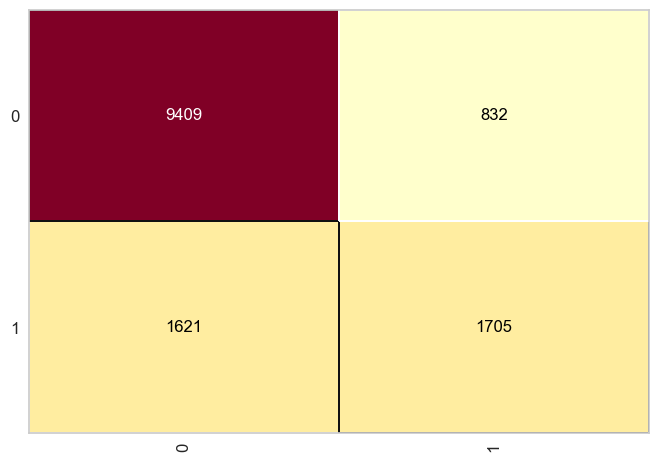

In [46]:
#conda install -c districtdatalabs yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
#r_NC = RadiusNeighborsClassifier(radius=6.0)

### Aplicando classificação r-N com Laplace

In [47]:
def rNC_Lap(X_train_, X_test, raio, epsilon):
    #orçamento de composição para satisfazer eDP(e1+e2+...+ek)DP
    eps= epsilon/len(X_test)
    
    # predição das classificações por r-N com Laplace
    y_pred_rNC = []
    
    # classificando todas as instancias de teste no dataset (X_train) em que não estão presentes
    for t in X_test:
        # contagem de classes com r-N classifier para cada instancia de teste
        cont_r_N = [0,0]
        
        for i in X_train_:
            # calcula distancia euclideana
            dist = sqrt((i[0]-t[0])**2 + (i[1]-t[1])**2 + (i[2]-t[2])**2 + (i[3]-t[3])**2 + (i[4]-t[4])**2 + (i[5]-t[5])**2 + (i[6]-t[6])**2 + (i[7]-t[7])**2 + (i[8]-t[8])**2)

            if dist <= raio:
                if i[9] == 0: #contagem da classe 0. i[9] contém a classificação da classe da instancia analisada
                    cont_r_N[0] = cont_r_N[0] + 1
                else: #contagem da classe 1
                    cont_r_N[1] = cont_r_N[1] + 1
            #c_noises.append(sqrt((i[0]-t[0])**2 + (i[1]-t[1])**2 + (i[2]-t[2])**2 + (i[3]-t[3])**2 + (i[4]-t[4])**2 + (i[5]-t[5])**2 + (i[6]-t[6])**2 + (i[7]-t[7])**2 + (i[8]-t[8])**2))
        
        # adiciona ruído as contagens das classes
        ruido = np.random.laplace(0, 1.0/eps, 2)# gera dois ruidos por Laplace pelo orcamento da composicao
        cont_r_N[0] = cont_r_N[0] + ruido[0]
        cont_r_N[1] = cont_r_N[1] + ruido[1]
        
        #classifica instancia do teste pela maior quantidade de classes com ruído dentro do raio
        if cont_r_N[0] > cont_r_N[1]:
            y_pred_rNC.append(0)
        else:
            y_pred_rNC.append(1)

    return y_pred_rNC

### Obtendo predição para epsilon=0.5

In [66]:
ypd=rNC_Lap(X_train_,X_test, 6., 0.5)
ypd

[0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,


In [68]:
df_rN_05=pd.DataFrame(data=ypd)
df_rN_05

,0
0,0
1,0
2,1
3,0
4,1
...,...
13562,1
13563,1
13564,1
13565,0


In [69]:
nome_pred_csv = 'rN_Lap_predito_e05.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_05.to_csv(nome_pred_csv, sep=',', index=False)

### Obtendo predição para epsilon=1

In [67]:
ypd1=rNC_Lap(X_train_,X_test, 6., 1.)

In [70]:
df_rN_1=pd.DataFrame(data=ypd1)

In [71]:
nome_pred_csv = 'rN_Lap_predito_e1.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_1.to_csv(nome_pred_csv, sep=',', index=False)

### Obtendo predição para epsilon=5 

In [72]:
ypd5=rNC_Lap(X_train_,X_test, 6., 5.)

In [73]:
df_rN_5=pd.DataFrame(data=ypd5)

In [74]:
nome_pred_csv = 'rN_Lap_predito_e5.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_5.to_csv(nome_pred_csv, sep=',', index=False)

### Obtendo predição para epsilon=10

In [75]:
ypd10=rNC_Lap(X_train_,X_test, 6., 10.)

In [76]:
df_rN_10=pd.DataFrame(data=ypd10)

In [77]:
nome_pred_csv = 'rN_Lap_predito_e10.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_10.to_csv(nome_pred_csv, sep=',', index=False)

### Aplicando classificação r-N com exponenciação

In [50]:
def rNC_exp(X_train_, X_test, raio, epsilon):
    #orçamento de composição para satisfazer eDP(e1+e2+...+ek)DP
    eps= epsilon/len(X_test)
    
    # predição das classificações por r-N com Laplace
    y_pred_rNC = []
    
    # classificando todas as instancias de teste no dataset (X_train) em que não estão presentes
    for t in X_test:
        # contagem de classes com r-N classifier para cada instancia de teste
        cont_r_N = [0,0]
        
        for i in X_train_:
            # calcula distancia euclideana
            dist = sqrt((i[0]-t[0])**2 + (i[1]-t[1])**2 + (i[2]-t[2])**2 + (i[3]-t[3])**2 + (i[4]-t[4])**2 + (i[5]-t[5])**2 + (i[6]-t[6])**2 + (i[7]-t[7])**2 + (i[8]-t[8])**2)

            if dist <= raio:
                if i[9] == 0: #contagem da classe 0. i[9] contém a classificação da classe da instancia analisada
                    cont_r_N[0] = cont_r_N[0] + 1
                else: #contagem da classe 1
                    cont_r_N[1] = cont_r_N[1] + 1
            #c_noises.append(sqrt((i[0]-t[0])**2 + (i[1]-t[1])**2 + (i[2]-t[2])**2 + (i[3]-t[3])**2 + (i[4]-t[4])**2 + (i[5]-t[5])**2 + (i[6]-t[6])**2 + (i[7]-t[7])**2 + (i[8]-t[8])**2))
        
        # calcula probabilidade pelo peso (contagem) de cada classe
        cont_r_N[0] = np.exp(eps*cont_r_N[0]/2.)
        cont_r_N[1] = np.exp(eps*cont_r_N[1]/2.)
        
        #normaliza para soma = 1
        cont_r_N = cont_r_N / np.linalg.norm(cont_r_N, ord=1)
        
        #classifica instancia do teste pela probabilidade calculada da quantidade de classes dentro do raio
        escolha = np.random.choice([0,1], 1, p=cont_r_N)[0]
        y_pred_rNC.append(escolha)

    return y_pred_rNC

### Obtendo predição para epsilon=0.5

In [51]:
ypd_exp05=rNC_exp(X_train_,X_test, 6., 0.5)

In [52]:
df_rN_exp05=pd.DataFrame(data=ypd_exp05)

In [53]:
nome_pred_csv = 'rN_exp_predito_e05.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_exp05.to_csv(nome_pred_csv, sep=',', index=False)

### Obtendo predição para epsilon=1

In [54]:
ypd_exp1=rNC_exp(X_train_,X_test, 6., 1.)

In [55]:
df_rN_exp1=pd.DataFrame(data=ypd_exp1)

In [56]:
nome_pred_csv = 'rN_exp_predito_e1.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_exp1.to_csv(nome_pred_csv, sep=',', index=False)

### Obtendo predição para epsilon=5

In [57]:
ypd_exp5=rNC_exp(X_train_,X_test, 6., 5.)

In [59]:
df_rN_exp5=pd.DataFrame(data=ypd_exp5)

In [60]:
nome_pred_csv = 'rN_exp_predito_e5.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_exp5.to_csv(nome_pred_csv, sep=',', index=False)

### Obtendo predição para epsilon=10

In [63]:
ypd_exp10=rNC_exp(X_train_,X_test, 6., 10.)

In [64]:
df_rN_exp10=pd.DataFrame(data=ypd_exp10)

In [65]:
nome_pred_csv = 'rN_exp_predito_e10.csv'
if os.path.isfile(nome_pred_csv):
    os.remove(nome_pred_csv)
df_rN_exp10.to_csv(nome_pred_csv, sep=',', index=False)

### Calculando acurácias

#### r-N com Laplace e=0.5

In [44]:
nome_pred_csv = 'rN_Lap_predito_e05.csv'
predito = pd.read_csv('./{0}'.format(nome_pred_csv), sep=',')
predito = predito.to_numpy()
predito

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [45]:
accuracy_score(y_test, predito)

0.5087344291295054

#### r-N com Laplace e=1

In [46]:
nome_pred_csv = 'rN_Lap_predito_e1.csv'
predito = pd.read_csv('./{0}'.format(nome_pred_csv), sep=',')
predito = predito.to_numpy()

In [47]:
accuracy_score(y_test, predito)

0.5122724257389253

#### r-N com Laplace e=5

In [48]:
nome_pred_csv = 'rN_Lap_predito_e5.csv'
predito = pd.read_csv('./{0}'.format(nome_pred_csv), sep=',')
predito = predito.to_numpy()

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [49]:
accuracy_score(y_test, predito)

0.5716812854721014

#### r-N com Laplace e=10

In [50]:
nome_pred_csv = 'rN_Lap_predito_e10.csv'
predito = pd.read_csv('./{0}'.format(nome_pred_csv), sep=',')
predito = predito.to_numpy()

In [51]:
accuracy_score(y_test, predito)

0.622318861944424

#### r-N com exponencial e=0.5

In [58]:
accuracy_score(y_test, ypd_exp05)

0.49952089629247437

#### r-N com exponencial e=1

In [61]:
accuracy_score(y_test, ypd_exp1)

0.5129358001031916

#### r-N com exponencial e=5

In [62]:
accuracy_score(y_test, ypd_exp5)

0.5472838505196432

#### r-N com exponencial e=10

In [66]:
accuracy_score(y_test, ypd_exp10)

0.5791258200044225

### Gráfico de acurácias por epsilon e classificação r-N

In [62]:
acuracias = [[0.819193631606103,0.819193631606103,0.819193631606103,0.819193631606103], [0.5087344291295054,0.5122724257389253,0.5716812854721014,0.622318861944424],[0.49952089629247437,0.5129358001031916,0.5472838505196432,0.5791258200044225]]
acuXeps = pd.DataFrame(data=acuracias, columns=['0.5', '1','5','10'])
acuXeps = acuXeps.rename(index={0: "KNN", 1: "r-N_Lap", 2: "r-N_exp"})
acuXeps

,0.5,1,5,10
KNN,0.819194,0.819194,0.819194,0.819194
r-N_Lap,0.508734,0.512272,0.571681,0.622319
r-N_exp,0.499521,0.512936,0.547284,0.579126


In [59]:
import matplotlib.pyplot as plt

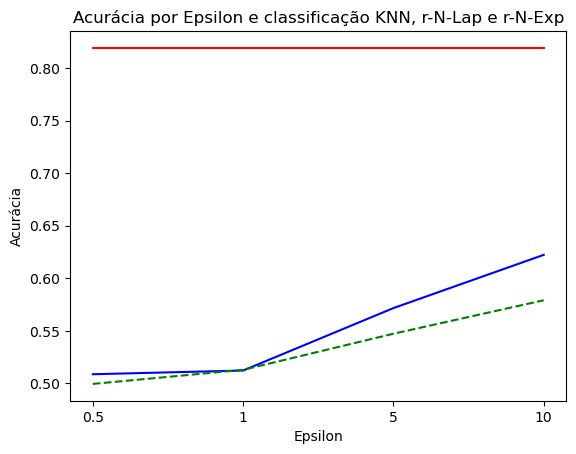

In [76]:
plt.plot(acuXeps.columns.values, acuXeps.loc['KNN'].to_numpy(), 'r', label=r'KNN')
plt.plot(acuXeps.columns.values, acuXeps.loc['r-N_Lap'].to_numpy(), 'b', label=r'r-N_Laplace')
plt.plot(acuXeps.columns.values, acuXeps.loc['r-N_exp'].to_numpy(), 'g--', label=r'r-N_Exponencial')
plt.xlabel('Epsilon')
plt.ylabel('Acurácia')
plt.title('Acurácia por Epsilon e classificação KNN, r-N-Lap e r-N-Exp')
plt.show()